In [46]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

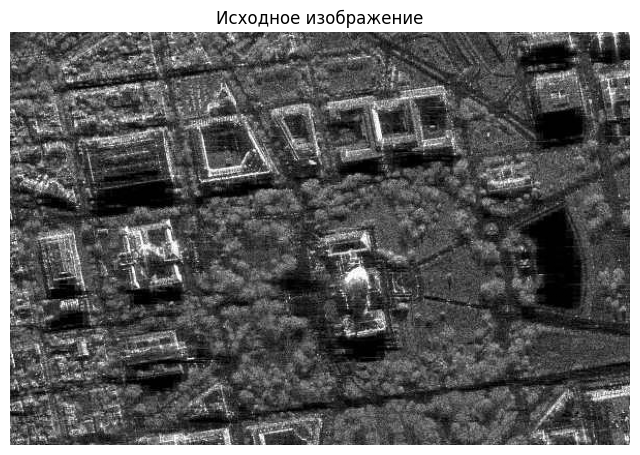

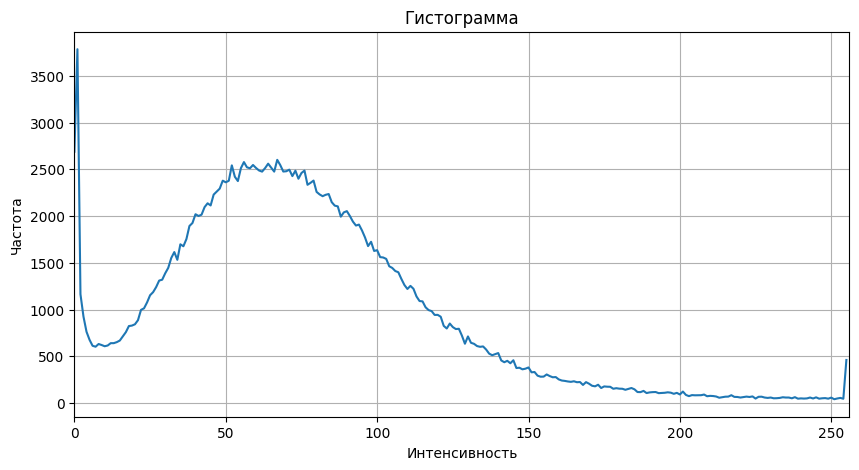

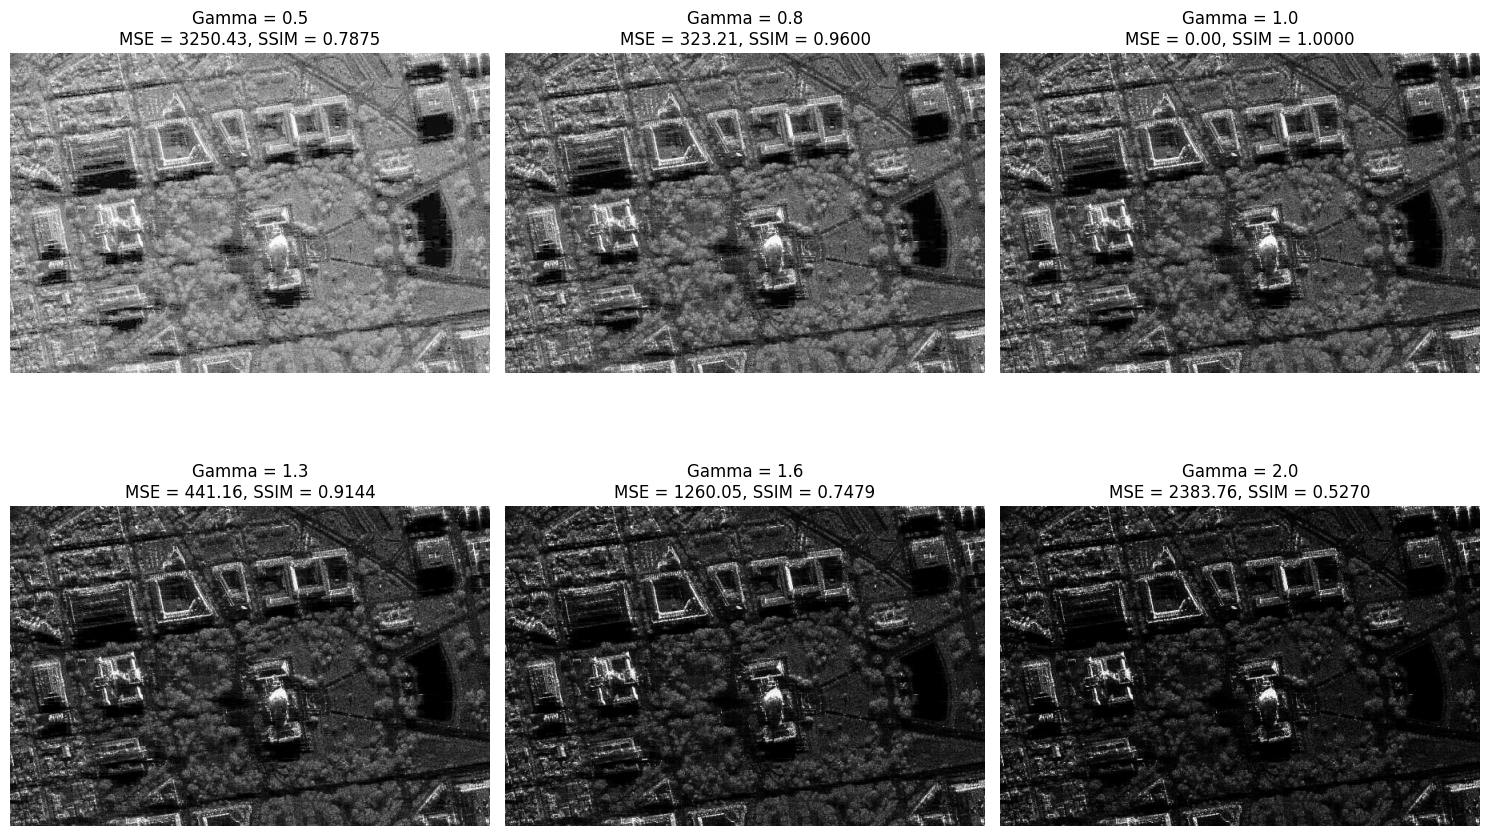

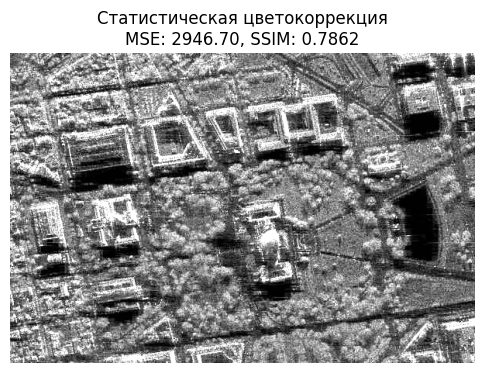

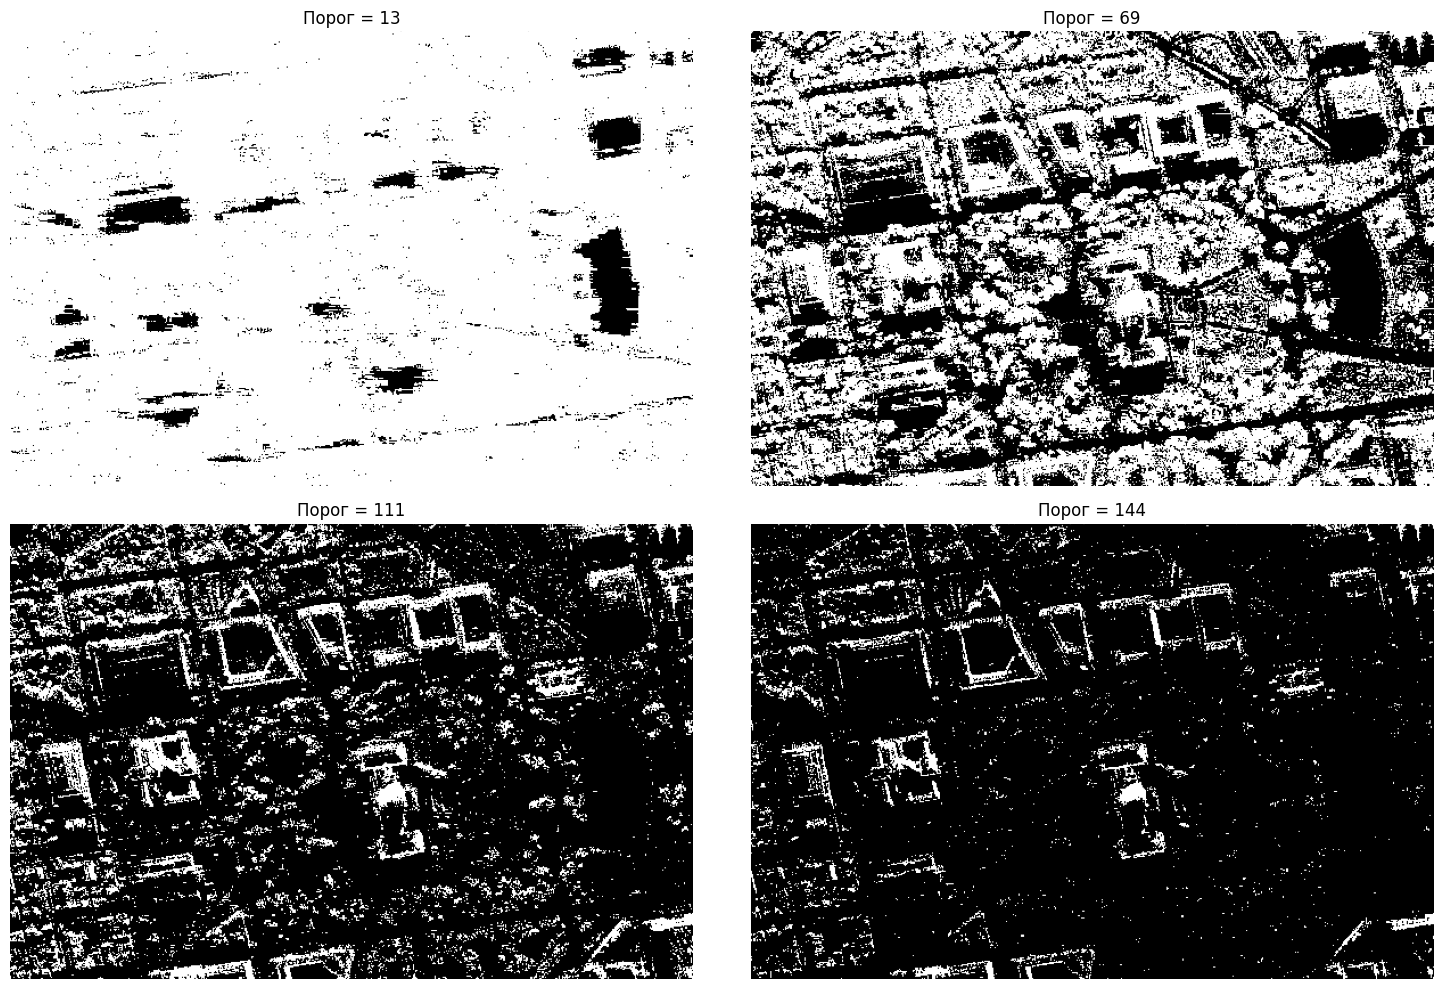

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def gamma_correction(image, gamma):
    normalized_image = image / 255.0
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = np.uint8(corrected_image * 255)
    return corrected_image

def calculate_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compare_images(original, corrected):
    mse_val = calculate_mse(original, corrected)
    ssim_val = ssim(original, corrected, multichannel=False)
    return mse_val, ssim_val

def statistical_color_correction(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    eq_gray = cv2.equalizeHist(gray_image)
    
    mean_src = gray_image.mean()
    std_src = gray_image.std()
    mean_ref = eq_gray.mean()
    std_ref = eq_gray.std()
    
    b, g, r = cv2.split(image.astype(np.float32))

    for channel in [b, g, r]:
        channel_mean = channel.mean()
        channel_std = channel.std()
        
        if channel_std > 0:
            channel[:] = (channel - channel_mean) * (std_ref / std_src) + mean_ref
    
    b = np.clip(b, 0, 255).astype(np.uint8)
    g = np.clip(g, 0, 255).astype(np.uint8)
    r = np.clip(r, 0, 255).astype(np.uint8)
    
    corrected_image = cv2.merge((b, g, r))
    return corrected_image

def threshold_filtering(image, threshold):
    _, thr_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thr_image

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

def display_image(image, title, cmap='gray', figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_histogram(image, title='Гистограмма'):
    hist = cv2.calcHist([image], [0], None, [256], (0, 256))
    plt.figure(figsize=(10, 5))
    plt.plot(hist)
    plt.title(title)
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')
    plt.xlim([0, 256])
    plt.grid()
    plt.show()

def apply_gamma_correction(gray_image, gamma_values):
    plt.figure(figsize=(15, 10))
    
    for i, gamma in enumerate(gamma_values):
        corrected_image = gamma_correction(gray_image, gamma)
        mse_value, ssim_value = compare_images(gray_image, corrected_image)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(corrected_image, cmap='gray')
        plt.title(f'Gamma = {gamma}\nMSE = {mse_value:.2f}, SSIM = {ssim_value:.4f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def apply_statistical_correction(image, gray_image):
    statistical_corrected_image = statistical_color_correction(image)
    statistical_corrected_gray = cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2GRAY)
    mse_statistical, ssim_statistical = compare_images(gray_image, statistical_corrected_gray)
    
    display_image(
        cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2RGB),
        f'Статистическая цветокоррекция\nMSE: {mse_statistical:.2f}, SSIM: {ssim_statistical:.4f}',
        cmap=None,
        figsize=(6, 6)
    )
    
    return mse_statistical, ssim_statistical

def apply_threshold_filtering(gray_image, threshold_values):
    plt.figure(figsize=(15, 10))
    
    for i, threshold in enumerate(threshold_values):
        thresholded_image = threshold_filtering(gray_image, threshold)
        
        plt.subplot(2, 2, i+1)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'Порог = {threshold}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    image_path = 'sar_1_gray.jpg'
    gamma_values = [0.5, 0.8, 1.0, 1.3, 1.6, 2.0]
    threshold_values = [13, 69, 111, 144]
    
    image, gray_image = load_and_preprocess_image(image_path) # загрузка и подготовка изображения
    
    display_image(gray_image, 'Исходное изображение') # отображение исходного изображения
    
    plot_histogram(gray_image) # построение гистограммы
    
    apply_gamma_correction(gray_image, gamma_values) # применение гамма-коррекции
    
    mse_stat, ssim_stat = apply_statistical_correction(image, gray_image) # применение статистической цветокоррекции
    
    apply_threshold_filtering(gray_image, threshold_values)  # применение пороговой фильтрации

if __name__ == "__main__":
    main()